In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Show all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"shape of {var}: {dataset.variables[var].shape}")

shape of size: (1000, 3)
shape of max_height: (1000, 3)
shape of cloud_base_area: (1000, 3)
shape of max_w: (1000, 3)
shape of max_w_cloud_base: (1000, 3)
shape of surface_area: (1000, 3)
shape of ql_flux: (1000, 3)
shape of mass_flux: (1000, 3)
shape of mass_flux_per_level: (1000, 3, 160)
shape of location_x: (1000, 3)
shape of location_y: (1000, 3)
shape of location_z: (1000, 3)
shape of cloud_points: (1000, 3, 10000, 3)
shape of height: (160,)


# Mass Flux

Vertical distribution of mass flux

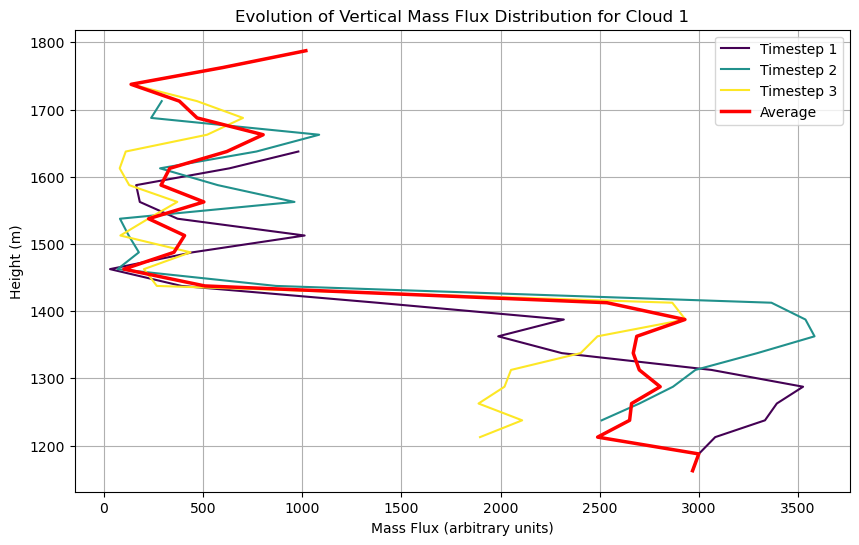

In [2]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Update this path
dataset = Dataset(nc_file, 'r')

# Select a specific cloud track to visualize
cloud_index = 0 # Set the index of the cloud you want to visualize

# Read the mass flux per level data for the specific cloud track
mass_flux_per_level = dataset.variables['mass_flux_per_level'][cloud_index, :, :].T  # Transpose to get shape (levels, timesteps)

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps for this specific cloud
num_timesteps = mass_flux_per_level.shape[1]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Plot mass flux distribution for each timestep
for timestep in range(num_timesteps):
    if not np.all(np.isnan(mass_flux_per_level[:, timestep])):  # Check if there's data for this timestep
        plt.plot(mass_flux_per_level[:, timestep], heights, label=f'Timestep {timestep+1}', color=colors[timestep])

# Calculate and plot the average mass flux per level across all timesteps
average_mass_flux = np.nanmean(mass_flux_per_level, axis=1)
plt.plot(average_mass_flux, heights, label='Average', color='red', linewidth=2.5)

plt.xlabel('Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title(f'Evolution of Vertical Mass Flux Distribution for Cloud {cloud_index+1}')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()


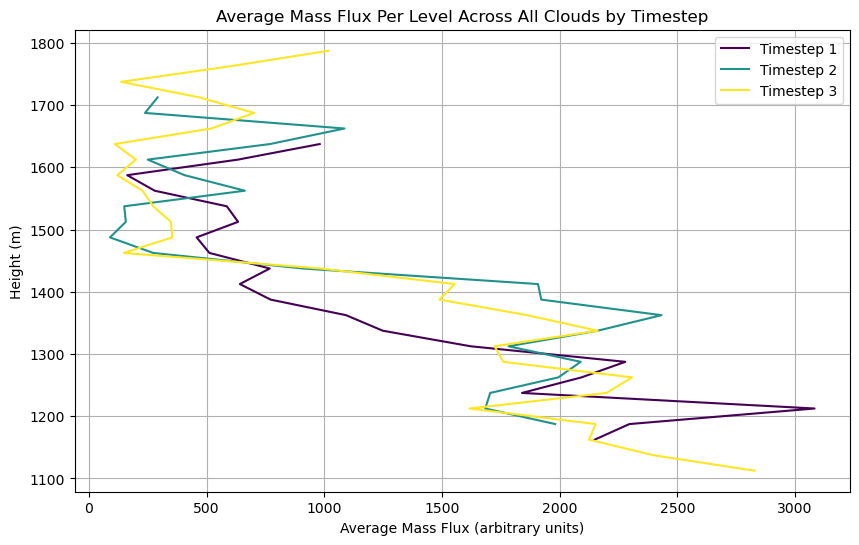

In [3]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the NetCDF file
nc_file = '../cloud_results.nc'  # Replace with the actual path to your NetCDF file
dataset = Dataset(nc_file, 'r')

# Read mass flux per level for all clouds and timesteps
mass_flux_per_level_all = dataset.variables['mass_flux_per_level'][:]

# Read the height levels to use as the y-axis
heights = dataset.variables['height'][:]

# Number of timesteps and number of tracks (clouds)
num_timesteps = mass_flux_per_level_all.shape[1]
num_tracks = mass_flux_per_level_all.shape[0]

# Set up the figure and axes for plotting
plt.figure(figsize=(10, 6))

# Generate a color map for the different timesteps
colors = cm.viridis(np.linspace(0, 1, num_timesteps))

# Loop through each timestep to calculate and plot the average mass flux per level across all clouds
for timestep in range(num_timesteps):
    # Extract data for the current timestep from all tracks
    mass_flux_at_timestep = mass_flux_per_level_all[:, timestep, :]

    # Calculate the average across all tracks (clouds) for this timestep, ignoring NaNs
    average_mass_flux_at_timestep = np.nanmean(mass_flux_at_timestep, axis=0)

    # Plot this average mass flux against height levels
    plt.plot(average_mass_flux_at_timestep, heights, label=f'Timestep {timestep+1}', color=colors[timestep])

plt.xlabel('Average Mass Flux (arbitrary units)')
plt.ylabel('Height (m)')
plt.title('Average Mass Flux Per Level Across All Clouds by Timestep')
plt.grid(True)
plt.legend()
plt.show()

dataset.close()
